# Desafio 2.3.

Construa um regressor e identifique quais variáveis exercem maior impacto sobre o “target” e informe o porquê interpretando os resultados obtidos. 

métricas: RMSE, R2 e cor(target_observado, target_predito);

dados: regression_data.zip.

#### Bibliotecas que vamos precisar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
db_train = pd.read_csv('regression_train.csv')

In [3]:
db_train.sample(3)

,target,X1,X2,X3,X4,X5,X6,X7
983,NaN,2.312178,-5.058973,47.462857,0.035284,-66.878038,8,-11.888587
979,NaN,1.674865,-5.671871,57.044752,4.189625,-59.293016,5,-13.328897
708,NaN,0.034340,-2.896909,53.293120,11.303295,-64.242989,8,-6.807737


In [4]:
db_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  715 non-null    float64
 1   X1      1042 non-null   float64
 2   X2      1031 non-null   float64
 3   X3      1042 non-null   float64
 4   X4      1042 non-null   float64
 5   X5      1042 non-null   float64
 6   X6      1042 non-null   int64  
 7   X7      1042 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 65.2 KB


In [5]:
db_train.isna().sum()

target    327
X1          0
X2         11
X3          0
X4          0
X5          0
X6          0
X7          0
dtype: int64

In [6]:
db_train.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1042 entries, 0 to 1041
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  715 non-null    float64
 1   X1      1042 non-null   float64
 2   X2      1031 non-null   float64
 3   X3      1042 non-null   float64
 4   X4      1042 non-null   float64
 5   X5      1042 non-null   float64
 6   X6      1042 non-null   int64  
 7   X7      1042 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 73.3 KB


#### Tem muitos nulls na variavel target(y), perto de 75%<br>
Podemos obtar por duas estrategias:<br>
1) Eliminamos todos os nulls
2) Preenchemos os nulls com o fill, dando a eles um valor proximo a outro registrado, ou dando a eles o valor promedio

#### Por praticidade, vamos sempre começar pelo mais simples, neste caso, sería eliminar os nulls

In [7]:
db_train.dropna(how='any',inplace=True)

In [8]:
db_train.describe()

,target,X1,X2,X3,X4,X5,X6,X7
count,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000
mean,1349.940229,3.367040,1.541895,50.089566,2.330196,-64.986930,4.576224,3.623453
std,1593.201095,2.830287,3.236113,4.067153,2.498788,9.524299,3.237256,7.604867
min,0.062551,-4.079909,-3.786653,38.035456,0.009815,-121.450423,0.000000,-8.898633
25%,230.632308,1.510589,-0.973832,47.423904,0.597640,-69.085396,0.000000,-2.288504
50%,808.374368,3.354627,1.056399,50.137764,1.526100,-65.078252,5.000000,2.482539
75%,1849.754221,5.127394,3.448100,52.871490,3.143906,-61.117380,8.000000,8.103036
max,10382.469480,12.380693,12.926106,62.972372,18.813009,53.919202,8.000000,30.376348


In [9]:
db_train.X6.value_counts()

8    254
5    248
0    213
Name: X6, dtype: int64

In [10]:
# Vamos a eliminar as features, que tenham um valor de correlação muito pequeno como X4 e X5, 
# apesar de X3 e X6 tambem serem muito pequenos, vamos mantelos para não eliminar tantas variaveis
db_train.corr()

# Podemos Já observar que X2 e X7 tem altos indices de correlação.

,target,X1,X2,X3,X4,X5,X6,X7
target,1.000000,0.514485,0.938318,0.057441,-0.011001,-0.023407,0.040508,0.938318
X1,0.514485,1.000000,0.391877,-0.043520,0.004531,0.009388,0.034558,0.391877
X2,0.938318,0.391877,1.000000,0.030203,0.091770,-0.055510,0.045088,1.000000
X3,0.057441,-0.043520,0.030203,1.000000,0.095165,0.010467,-0.004720,0.030203
X4,-0.011001,0.004531,0.091770,0.095165,1.000000,-0.057918,-0.021941,0.091770
X5,-0.023407,0.009388,-0.055510,0.010467,-0.057918,1.000000,-0.050802,-0.055510
X6,0.040508,0.034558,0.045088,-0.004720,-0.021941,-0.050802,1.000000,0.045088
X7,0.938318,0.391877,1.000000,0.030203,0.091770,-0.055510,0.045088,1.000000


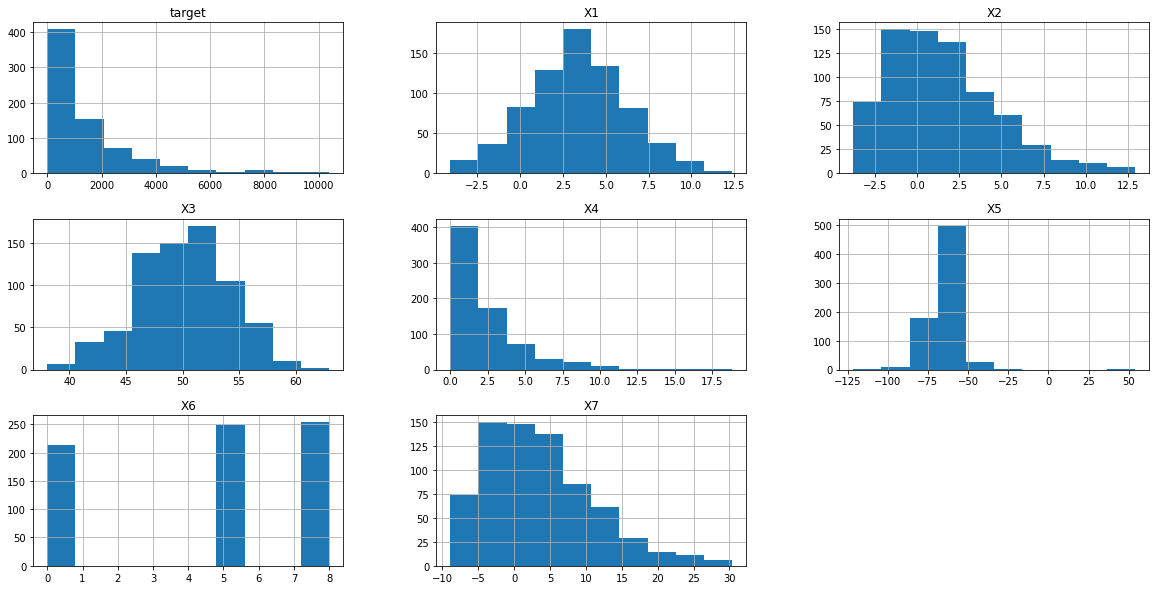

In [11]:
db_train.hist(figsize=(20,10));

In [12]:
db_test = pd.read_csv('regression_test.csv')
db_test.dropna(how='all',inplace=True)

### Como a database não tem muitos registros, vamos a utilizar um modelo simples, sem muitos parametros.<br>

Standarização

Ja que as curvas não respeitão um padrão de normalização, vamos a utilizar um standarscaler, ja que aparentemente a falta de uma curva normal é mais significativa do que a 
quantidade de outliers

Caso fosse o contrario, e o numero de outliers fosse mais significativo, utilizariamos um robustscaler ou um minmaxscaler

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
to_scale = ['X1','X2','X3','X6','X7']

In [15]:
db_train[to_scale] = scaler.fit_transform(db_train[to_scale])
db_test[to_scale] = scaler.fit_transform(db_test[to_scale])

In [16]:
db_train.sample(5)

,target,X1,X2,X3,X4,X5,X6,X7
778,699.009580,0.400426,-0.542146,1.601344,1.141944,-60.104085,0.130998,-0.542146
662,179.345579,0.130230,-0.922785,-1.064190,2.381001,-53.238546,-1.414602,-0.922785
996,5069.430576,0.011423,2.172231,0.711180,0.645249,-67.840334,-1.414602,2.172231
498,904.302042,-0.468217,0.021250,-0.376380,1.517226,-77.665405,1.058357,0.021250
692,579.638589,-0.271044,-0.386388,-0.515506,0.357992,-65.975142,0.130998,-0.386388


In [272]:
db_train.describe().round(5)

,target,X1,X2,X3,X4,X5,X6,X7
count,715.00000,715.00000,715.00000,715.00000,715.00000,715.00000,715.00000,715.00000
mean,1349.94023,-0.00000,0.00000,-0.00000,2.33020,-64.98693,-0.00000,-0.00000
std,1593.20109,1.00070,1.00070,1.00070,2.49879,9.52430,1.00070,1.00070
min,0.06255,-2.63301,-1.64774,-2.96585,0.00982,-121.45042,-1.41460,-1.64774
25%,230.63231,-0.65638,-0.77794,-0.65587,0.59764,-69.08540,-1.41460,-0.77794
50%,808.37437,-0.00439,-0.15013,0.01186,1.52610,-65.07825,0.13100,-0.15013
75%,1849.75422,0.62241,0.58945,0.68448,3.14391,-61.11738,1.05836,0.58945
max,10382.46948,3.18694,3.52033,3.16974,18.81301,53.91920,1.05836,3.52033


In [17]:
db_train.corr()

,target,X1,X2,X3,X4,X5,X6,X7
target,1.000000,0.514485,0.938318,0.057441,-0.011001,-0.023407,0.040508,0.938318
X1,0.514485,1.000000,0.391877,-0.043520,0.004531,0.009388,0.034558,0.391877
X2,0.938318,0.391877,1.000000,0.030203,0.091770,-0.055510,0.045088,1.000000
X3,0.057441,-0.043520,0.030203,1.000000,0.095165,0.010467,-0.004720,0.030203
X4,-0.011001,0.004531,0.091770,0.095165,1.000000,-0.057918,-0.021941,0.091770
X5,-0.023407,0.009388,-0.055510,0.010467,-0.057918,1.000000,-0.050802,-0.055510
X6,0.040508,0.034558,0.045088,-0.004720,-0.021941,-0.050802,1.000000,0.045088
X7,0.938318,0.391877,1.000000,0.030203,0.091770,-0.055510,0.045088,1.000000


Seleção de Features

In [18]:
FEATURES = ['X1','X2','X3','X6','X7']
TARGET = ['target']

In [19]:
X_train = db_train[FEATURES]
y_train = db_train[TARGET]

X_test = db_test[FEATURES]
y_test = db_test[TARGET]

# Multiple linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [21]:
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
lr.intercept_

array([1349.9402285])

In [23]:
lr.coef_

array([[280.27420871, 691.25439299,  61.85871047,  -7.23603113,
        691.25439299]])

In [24]:
y_pred = lr.predict(X_train)

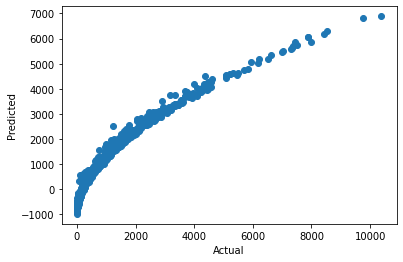

In [25]:
import matplotlib.pyplot as plt

plt.scatter(y_train,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [26]:
importances = lr.coef_
importances

array([[280.27420871, 691.25439299,  61.85871047,  -7.23603113,
        691.25439299]])

In [27]:
importances = pd.DataFrame(data=importances,
             columns=[FEATURES]).T

In [34]:
importances = importances.rename({0:'Importancia'},axis=1)

Métricas e importâncias

In [35]:
# Observamos que as variaveis 'X2' e 'X7' são as de maior relevancia, ja que tem o maior valor de coeficiente, pelo que os valores desta variavel afetarão mais o target.
# é importante mencionar que o mesmo modelo se fez mas sem standarizar e a importancia da variavel X7 era maior, provavelmente como ambas variaveis tem uma destribuição muito parecida,
# no momento da estandarização, se comportam praticamente no mesmo grau de influencia.
importances

,Importancia
X1,280.274209
X2,691.254393
X3,61.858710
X6,-7.236031
X7,691.254393


In [30]:
# Em relação ao coeficiente de determinação(r2), presenta um valor muito bom, chegando bastante perto ao 1, pelo que as variaveis independentes(features) 
# explicam em até um 90.7% as variações da variavel dependente(target) 

from sklearn.metrics import r2_score, mean_squared_error
print("r2: ", r2_score(y_train,y_pred))


r2:  0.9074194154122478


In [31]:
# Em relação ao rmse, presenta um valor elevado, pelo que pode chegar a presentar uma diferença significativa entre o observado e o previsto.
print("rmse: ", mean_squared_error(y_train,y_pred,squared=False))

rmse:  484.4251032139681
